# MNIST

In [204]:
mnist_raw = pd.read_csv('digit-recognizer/train.csv')

In [551]:
mnist = mnist_raw.loc[mnist_raw['label'].isin([1, 7])]
X = mnist.loc[:, 'pixel0':].values
y = mnist['label']

## Sample from PCA space

In [560]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca1 = X_pca[y==1]
X_pca7 = X_pca[y==7]

In [561]:
mean1, cov1 = X_pca1.mean(axis=0), np.cov(X_pca1, rowvar=False)
mean7, cov7 = X_pca7.mean(axis=0), np.cov(X_pca7, rowvar=False)

In [562]:
U, S, V = svd(cov1)
L1 = U @ sqrtm(np.diag(S))

U, S, V = svd(cov7)
L7 = U @ sqrtm(np.diag(S))

In [563]:
def generate_point_box_muller(random_state):
    u1 = random_state.uniform()
    u2 = random_state.uniform()
    z1 = sqrt(-2*log(u1)) * cos(2*pi*u2)
    z2 = sqrt(-2*log(u1)) * sin(2*pi*u2)
    
    return z1, z2

In [737]:
def generate_digit(random_state, meanA, meanB, LA, LB, pca, percentA):
    genA = meanA + LA @ generate_point_box_muller(random_state)
    genB = meanB + LB @ generate_point_box_muller(random_state)
    gen_pca = percentA * genA + (1-percentA) * genB
    gen_original = pca.inverse_transform(gen_pca)
    return gen_pca, gen_original

In [738]:
gen_digits = {}

In [739]:
rng = np.random.RandomState(seed=42)

[]

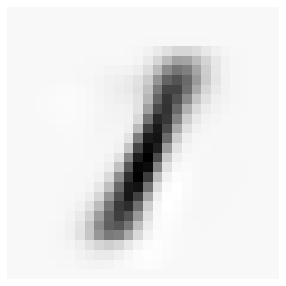

In [823]:
fig, ax = plt.subplots(figsize=(5, 5))
gen_pca, gen_original = generate_digit(rng, mean1, mean7, L1, L7, pca, percentA=1)
gen_original = gen_original.reshape(28, 28)
ax.imshow(gen_original)
ax.set_xticks([])
ax.set_yticks([])

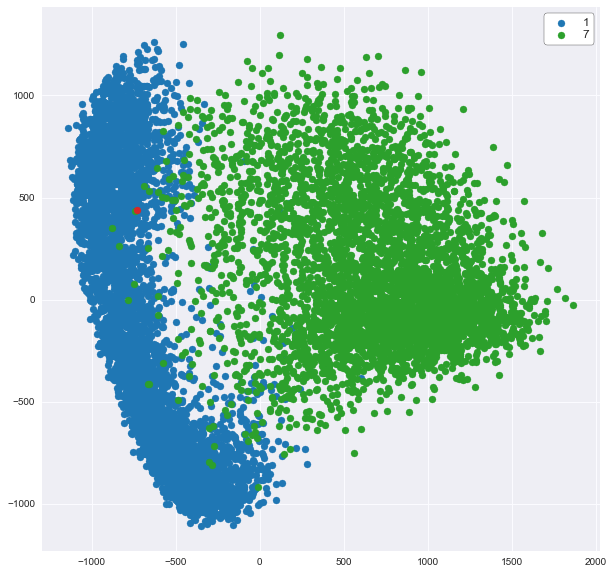

In [824]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_pca1[:, 0], X_pca1[:, 1], color='tab:blue', label='1')
ax.scatter(X_pca7[:, 0], X_pca7[:, 1], color='tab:green', label='7')
ax.scatter(gen_pca[0], gen_pca[1], color='tab:red')
ax.legend(**legend_opts)

In [826]:
gen_digits[1] = (gen_pca, gen_original)

In [ ]:
gen_digits

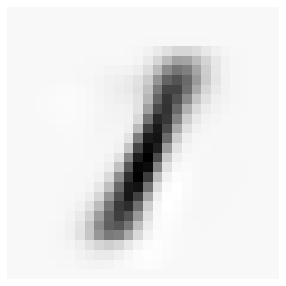

In [841]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, (percent, points) in enumerate(gen_digits.items()):
    ax.imshow(points[1])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.savefig(f'viz/mnist{percent}.png', bbox_inches = 'tight', pad_inches = 0)

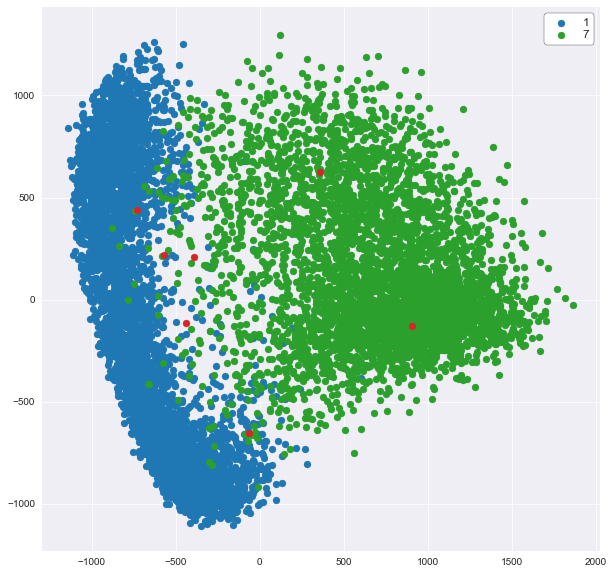

In [840]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_pca1[:, 0], X_pca1[:, 1], color='tab:blue', label='1')
ax.scatter(X_pca7[:, 0], X_pca7[:, 1], color='tab:green', label='7')
for percent, points in gen_digits.items():
    point_pca = points[0]
    ax.scatter(point_pca[0], point_pca[1], color='tab:red')
ax.legend(**legend_opts)
fig.savefig('viz/mnist.png')

## Sample directly from original space

In [842]:
mean1, cov1 = X[y==1].mean(axis=0), np.cov(X[y==1], rowvar=False)
mean7, cov7 = X[y==7].mean(axis=0), np.cov(X[y==7], rowvar=False)
U, S, V = svd(cov1)
L1 = U @ sqrtm(np.diag(S))

U, S, V = svd(cov7)
L7 = U @ sqrtm(np.diag(S))

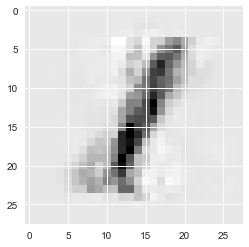

In [862]:
normal_samples = []
while len(normal_samples) < len(mean1):
    sample_pair = generate_point_box_muller(rng)
    normal_samples.append(sample_pair[0])
    normal_samples.append(sample_pair[1])

plt.imshow((mean1 + L1 @ np.array(normal_samples)).reshape(28, 28))